# **Table of Contents**

1. [Introduction](#Section1)<br>
2. [Problem Statement](#Section2)<br>
3. [Installing & Importing Libraries](#Section3)<br>
4. [Data Acquisition & Description](#Section4)<br>
5. [Data Pre-processing](#Section5)<br>
6. [Pre-Exploratory Data Analysis](#Section6)<br>
  6.1 [General Transactional Analysis](#Section61)<br>
  6.2 [Customer & Merchant Transactional Analysis](#Section62)<br>
7. [Post Data Processing & Analysis](#Section7)<br>
8. [Model Development & Evaluation](#Section8)<br>
  8.1 [Baseline Models](#Section81)<br>
    - 8.1.1 [Logisitc Regression](#Section811)<br>
    - 8.1.2 [Decision Tree Classifier](#Section812)<br>
    - 8.1.3 [Random Forest Classifier](#Section813)<br>
    - 8.1.4 [Extreme Gradient Boosting Classifier](#Section814)<br>

  8.2 [Oversampling Models](#Section82)<br>
    - 8.2.1 [Logisitc Regression](#Section821)<br>
    - 8.2.2 [Decision Tree Classifier](#Section822)<br>
    - 8.2.3 [Random Forest Classifier](#Section823)<br>
    - 8.1.4 [Extreme Gradient Boosting Classifier](#Section824)<br>
9. [Conclusion](#Section9)<br>


<a id = Section1></a>
# **1. Introduction**

In this technological era, society is becoming more cashless. According to the <a href="https://worldpaymentsreport.com/wp-content/uploads/sites/5/2019/09/World-Payments-Report-WPR-2019.pdf">World Payment Report 2019</a>, global non-cash transaction volumes grew a **12%** during **2016-17** to reach **539 billion - the highest in past two decades**:
* Emerging markets led the growth charge. Emerging **Asia (32%)** and **CEMEA (19%) were highest** in global non-cash transaction volumes. **CEMEA** is an acronym for Central and Eastern Europe, Middle East and Africa.
* **Mature markets**, including mature APAC, Europe and North America maintained a **growth rate** of nearly **7%** which aligns with predictions for these markets.

<center><img src="https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Finance/Fraud%20Detection%20in%20Financial%20Transaction%201.png"></center>
<center>World Payment Report Forecast<center></center>

<a id = Section2></a>
# **2. Problem Statement**

**Mobile** money **transactions are emerging rapidly** in the era of Intelligent Machines, while on the flip side **fraudulent transactions are on the rise** as well. Even with the updated **security measures**, we are still facing an issue of **very high amount of money loss**.


<center><img src="https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Finance/Fraud%20Detection%20in%20Financial%20Transaction%202.jpg"></center>

**<h4>Scenario:</h4>**

Let's say a company named as **IPAYU** has been **providing** it's **financial services** to the variety of users in a country. But at the same time **there are loopholes in security measures** (in the meanwhile company is upgrading it's security). **Fraudster** might try to crack inside the company's interface and **can commit fraudulent transactions**. It may harm people trust towards the company. To tackle this situation of crisis, **they** have **consulted a team of data scientists**.

Now the question is how this problem could be solved using data science? While there are many ways to prevent the fraud and loss occur. Let's walk through a simple pave how this team handled problem of **fraudulent transaction to identify and automate model for future transactions.**

The **target feature** in the acquired data set is **check_fraud** over the customer transactions.

|Target Feature|Potential Values|
| :-- | :-- |
|check_fraud|0: Not Fraud|
||1: Fraud|


<a id = Section3></a>
# **3. Installing & Importing Libraries**

### **Installing Libraries**

In [ ]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data
!pip install -q yellowbrick                   # A visualization library for Machine Learning

### **Upgrading Libraries**

**Note:** After upgrading, you need to restart the runtime. Make sure not to execute the cell again after restarting the runtime.

In [9]:
!pip install -q --upgrade pandas-profiling 

In [9]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


### **Importing Libraries**

In [3]:
# For Panel Data Analysis
import pandas as pd
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# For Numerical Python
import numpy as np

# For Random Data
from random import randint

# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For scientific calculations
from scipy import stats

# For Data Model Development
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

# To handle class imbalance problem
from imblearn.over_sampling import SMOTE

# For Machine Learning Model Evaluation
from xgboost import plot_importance, to_graphviz
from sklearn.metrics import classification_report
from yellowbrick.classifier import PrecisionRecallCurve

# To Disable Warnings
import warnings
warnings.filterwarnings("ignore")

<a id = Section4></a>
# **4. Data Acquisition & Description**



We have extracted **data for financial transactions** and the link can be retrieved from the attached <a href = "https://storage.googleapis.com/industryanalytics/trans_fraud_data.csv">link</a>.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 6,362,620 | 10 | 457 MB| 

| Id | Features | Description |
| :-- | :--| :--| 
|01| **step** | Unit time in real world. Example one hour = one step, Max step is 743 = 31 days|
|02| **trans_type** | Transaction Type (CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER) |
|03| **trans_amount** | Amount of the transaction in local currency |
|04| **sender_name** | Person who initiated the transaction |
|05| **sender_old_bal** | Initial balance before transaction |
|06| **sender_new_bal** | New balance after transaction |
|07| **receiver** | Person who received the transaction |
|08| **receiver_old_bal** | Recipient's initial balance before transaction. Note that there is no information for customers that start with M (Merchants) i.e receiver_old_bal = 0. |
|09| **receiver_new_bal** | Recipient's new balance after transaction. Note that there is no information for customers that start with M (Merchants) i.e receiver_new_bal = 0. |
|10| **check_fraud** | This is the transactions made by the fraudulent agents. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts.|
|| |Then try to empty the funds by transferring to another account and then cashing out of the system. Transacted amount greater than 200,000 has been considered as fraudulent.|

In [5]:


def load_fraud_data():
  return pd.read_csv(r'C:\dda using python\assignments\projects\trans_fraud_data.csv')

In [6]:
data = load_fraud_data()
print('Data Shape:', data.shape)
data.head()

Data Shape: (6362620, 10)


,step,trans_type,trans_amount,sender_name,sender_old_bal,sender_new_bal,receiver,receiver_old_bal,receiver_new_bal,check_fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


**Quick view over transaction type**

In [10]:
# (CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER)
data.trans_type.value_counts()           

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: trans_type, dtype: int64

### **Data Description**

In this section we will get **information about the data** and see some observations.

In [11]:
data.describe()

,step,trans_amount,sender_old_bal,sender_new_bal,receiver_old_bal,receiver_new_bal,check_fraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


**Observation:**


  - The **numbers are** pretty **large** for description.
  - **25% of data is zero** for sender_old_bal, receiver_old_bal & receiver_new_bal.
  - **50% of data is zero** for sender_new_bal.
  - On **average, transaction amount** of **~$\$$179861.9 dollars** have been seen moving to and fro **over** the **accumulated data**.
  - **25%** of transactions have happened with **amount <= $\$$13389.57 dollars**. 
  - **50%** of transactions have happened with **amount <= $\$$74871.94 dollars**.
  - **75%** of transactions have happened with **amount <=
$\$$208721.5 dollars**.
  

### **Data Information**

In this section we will see the **information about the types of features**.

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
step                int64
trans_type          object
trans_amount        float64
sender_name         object
sender_old_bal      float64
sender_new_bal      float64
receiver            object
receiver_old_bal    float64
receiver_new_bal    float64
check_fraud         int64
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


**Observation:**

- We can see that all the **check_fraud** has been **identified** as **incorrect** data type i.e. integer. But it **should** be boolean instead.

### **Pre Profiling Report**

In [0]:
profile = ProfileReport(df = data)

In [0]:
profile.to_file(output_file = "Pre Profiling Report.html")
print('Pre-Profiling Accomplished!')

Pre-Profiling Accomplished!


**Observation:**

- There were **no missing cells**.
- There were **no duplicate rows**.
- There are 6 numerical, 3 categorical and 1 bool features.
- **trans_amount is** found to be **highy skewed**.
- **sender_name & receiver is found to be cardinal in nature** i.e. containing distinct values.
- **sender_old_bal** is found to **have 33% of zeros** and **sender_new_bal 56.7% of zeros**.
- **receiver_old_bal** is found to **have 42.5% of zeros** and **receiver_new_bal 38.3% of zeros**.
- **trans_type** feature **contains imbalanced classes**, DEBIT type contains frequency of 41432 with respect to whole data.
- **Fraudulent transctions are 8213** with respect to whole data which defines the class imbalance.

<a id = Section5></a>
# **5. Data Pre-Processing**

### **Identification & Handling of Missing Values**

In [12]:
null_frame = pd.DataFrame(data.isnull().sum(), columns = ['Frequency'])
null_frame.transpose()

,step,trans_type,trans_amount,sender_name,sender_old_bal,sender_new_bal,receiver,receiver_old_bal,receiver_new_bal,check_fraud
Frequency,0,0,0,0,0,0,0,0,0,0


In [24]:
data['step'] = data['step'].astype(float)
data['check_fraud'] = data['check_fraud'].astype(float)


**Observation:**

- It turns out that there are **no null values present** in our features.

### **Numerical Data Distribution**

In [25]:
num_features = []

for i in data.columns:
    if ((data[i].dtype == int) | (data[i].dtype == float)):
        num_features.append(i)
    
print('Total Numerical Features:', len(num_features))
print(num_features)

Total Numerical Features: 7
['step', 'trans_amount', 'sender_old_bal', 'sender_new_bal', 'receiver_old_bal', 'receiver_new_bal', 'check_fraud']


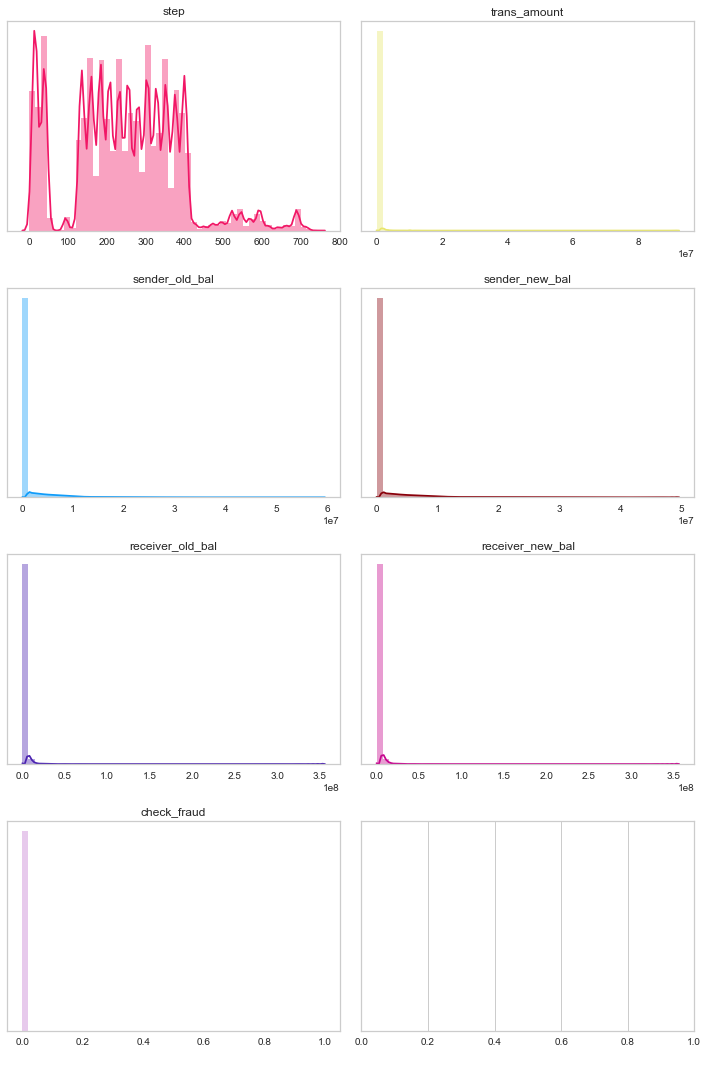

In [26]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, sharex = False, figsize=(10, 15))

colors = []
for i in range(7):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

for ax, col, color in zip(axes.flat, num_features, colors):
    sns.distplot(a = data[col], bins = 50, ax = ax, color = color)
    ax.set_title(col)
    plt.setp(axes, yticks=[])
    ax.set_xlabel(' ')
    ax.grid(False)
plt.tight_layout()
plt.show()

**Observation:**
- All **numerical features are found to positively skewed except step feature**.
- **step** feature **contains random distribution** of data.

### **Identification & Handling of Duplicate Rows**

Let's identify whether there **duplicate rows** present in the data or not.

In [0]:
print('Contains Duplicate Rows?', data.duplicated().any())

Contains Duplicate Rows? False


**Observation:**

- It turns out that there are **no duplicate rows present** in our data.

**Observation:**

- It turns out that there are **no duplicate columns present** in our data.

### **Identification & Handling of Inconsistent Data Type**

**Before changes: Respective Data Type per Feature**

In [0]:
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

,step,trans_type,trans_amount,sender_name,sender_old_bal,sender_new_bal,receiver,receiver_old_bal,receiver_new_bal,check_fraud
Type,int64,object,float64,object,float64,float64,object,float64,float64,int64


**Observation:**

- Following **features** contain **inconsitent data type**. A symbol &rarr; represents **will be changed to**:
  - **Feature** [ **Current Type** &rarr; **Desired Type** ]
  - check_fraud [ Integer &rarr; Boolean ]

**Performing Correction**

In [27]:
data['check_fraud'] = data['check_fraud'].astype(bool)

**After changes: Respective Data Type per Feature**

In [0]:
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

,step,trans_type,trans_amount,sender_name,sender_old_bal,sender_new_bal,receiver,receiver_old_bal,receiver_new_bal,check_fraud
Type,int64,object,float64,object,float64,float64,object,float64,float64,bool


<a id = Section6></a>
# **6. Pre-Exploratory Data Analysis**

<a id = Section61></a>
## **6.1 General Transactional Analysis**

**<h4>Question 1:** What is the **frequency & proportion of** each **transaction type** that has occured?</h4>

In [28]:
trans_type_frame = pd.DataFrame(data['trans_type'].value_counts())
trans_type_frame.columns = ['Frequency']
trans_type_frame.transpose()

,CASH_OUT,PAYMENT,CASH_IN,TRANSFER,DEBIT
Frequency,2237500,2151495,1399284,532909,41432


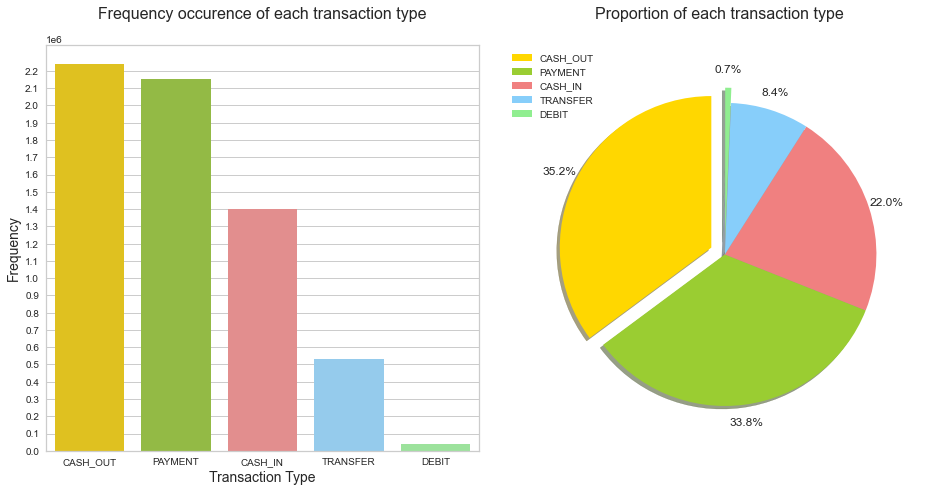

In [29]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
figure = plt.figure(figsize = [13.66, 7.3])
plt.subplot(1, 2, 1)
sns.barplot(data['trans_type'].value_counts().index, data['trans_type'].value_counts(), palette  = colors_list)
plt.yticks(range(0, 2300000, 100000))
plt.xlabel('Transaction Type', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Frequency occurence of each transaction type', y=1.05, size = 16)

explode_list = [0.1, 0, 0, 0, 0.1]

plt.subplot(1, 2, 2)
data['trans_type'].value_counts().plot(kind='pie', figsize=[13.66, 7.3], autopct='%1.1f%%', 
                                       startangle=90, shadow=True, labels=None, pctdistance=1.12, colors=colors_list, explode=explode_list)
plt.title('Proportion of each transaction type', y=1.05, size = 16)
plt.ylabel('')
plt.axis('equal')
plt.legend(labels = data['trans_type'].value_counts().index, loc = 'upper left')
plt.tight_layout(pad=2.0)
plt.show()

**Observation:**

- We can see that **CASH_OUT transactions occured more than any other type of transaction** in  i.e. around 35%.

**<h4>Question 2:** What is the **average amount** that has been **transfered** using **each transaction type**?</h4>

In [30]:
frame = data[['trans_type', 'trans_amount']].groupby('trans_type').mean().reset_index()
trans_amount_frame = pd.DataFrame(frame)
frame.columns = ['Transaction Type', 'Average Transacted Amount']
trans_amount_frame['Total Sum Amount'] = data[['trans_type', 'trans_amount']].groupby('trans_type').agg('sum').values
trans_amount_frame['Total Transactions'] = data[['trans_type', 'trans_amount']].groupby('trans_type').count().values
trans_amount_frame.transpose()

,0,1,2,3,4
Transaction Type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
Average Transacted Amount,168920,176274,5483.67,13057.6,910647
Total Sum Amount,2.36367e+11,3.94413e+11,2.27199e+08,2.80934e+10,4.85292e+11
Total Transactions,1399284,2237500,41432,2151495,532909


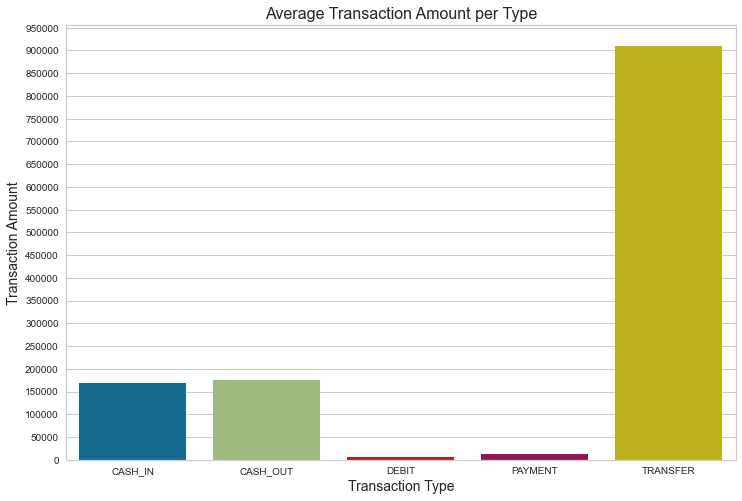

In [31]:
figure = plt.figure(figsize = [12, 8])
ax = sns.barplot(x = 'Transaction Type', y = 'Average Transacted Amount', data = trans_amount_frame)

plt.xlabel('Transaction Type', size = 14)
plt.ylabel('Transaction Amount', size = 14)
plt.yticks(range(0, 1000000, 50000))
plt.title('Average Transaction Amount per Type', size = 16)
plt.show()

**Observation:** 

- From above it is clearly visible that on **average** most of the **money** has **moved to and fro** on **TRANSFER** type of **transactions** i.e. **$\$$910647 dollars**.

**<h4>Question 3:** What is the **proportion of customers who are fraud and who are not**?</h4>

Customers who are not fraud: 6354407
Customers who are fraud: 8213


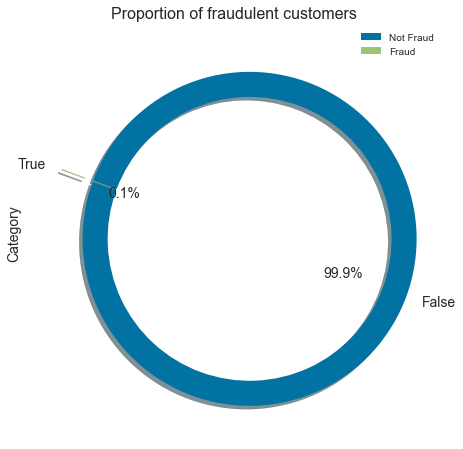

In [32]:
print('Customers who are not fraud:', data['check_fraud'].value_counts()[0])
print('Customers who are fraud:', data['check_fraud'].value_counts()[1])

space = np.ones(2)/10
data['check_fraud'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                    shadow = True, startangle = 160, figsize = [13.66, 7.68], legend = True)
plt.legend(['Not Fraud', 'Fraud'])
plt.ylabel('Category', size = 14)
plt.title('Proportion of fraudulent customers', size = 16)
plt.show()

**Observation:**

- As it can be seen that there is **high imbalance in clases**. 
- Only **0.1% of transactions are fraudulent** with respect to all other transactions.

**<h4>* Question 4:** What is the **frequency distribution of transactions types** happened **with respect to customer being fraud**?</h4> 

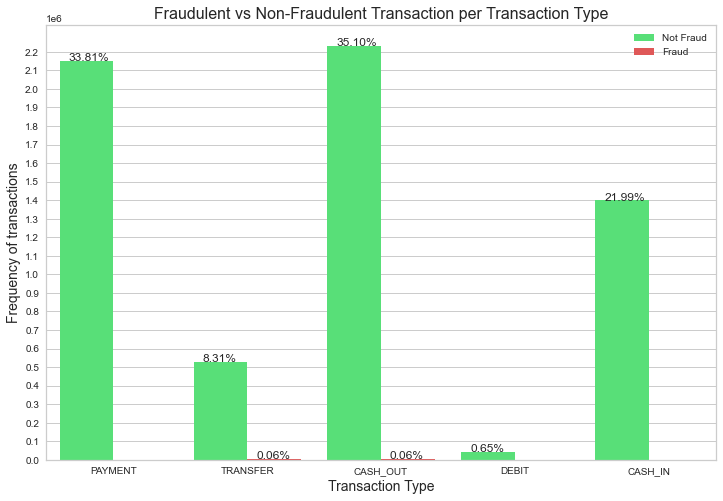

In [33]:
plt.figure(figsize = [12, 8])

ax = sns.countplot(x = 'trans_type', hue = 'check_fraud', data = data, palette = ['#42f56c', '#f54242'])

total = data.shape[0]

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 6
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))

ax.set_yticks(range(0, 2300000, int(1e5)))
ax.set_xlabel("Transaction Type", size = 14)
ax.set_ylabel("Frequency of transactions", size = 14)
ax.set_title("Fraudulent vs Non-Fraudulent Transaction per Transaction Type", size = 16)
ax.legend(labels = ['Not Fraud', 'Fraud'])
plt.show()

**Observation:**

- From the above visual it can be easily **interpreted** that **fruaudulent** **transactions happened only in CASH_OUT** and **TRANSFER** type of **transactions**. So we will focus more deeply on these type of transactions.

**<h4>Question 5:** What is the **minimumn & maximum transaction amount identified as fraudulent** transaction?</h4>



In [34]:
min_amount = data.loc[data['check_fraud'] == 1]['trans_amount'].min()
max_amount = data.loc[data['check_fraud'] == 1]['trans_amount'].max()
print('Minimum amount transacted as fraudulent =', min_amount)
print('Maximum amount transacted as fraudulent =', max_amount)

Minimum amount transacted as fraudulent = 0.0
Maximum amount transacted as fraudulent = 10000000.0


**Observation:**

- we can see that **minimum amount was 0 dollar** while **maximum amount was $10 million dollars**.

**<h4>Question 6:** What is the **minimumn & maximum transaction amount identified as non-fraudulent** transaction?</h4>

In [0]:
min_amount = data.loc[data['check_fraud'] == 0]['trans_amount'].min()
max_amount = data.loc[data['check_fraud'] == 0]['trans_amount'].max()
print('Minimum amount transacted fails to identify as fraudulent =', min_amount)
print('Maximum amount transacted fails to identify as fraudulent =', max_amount)

Minimum amount transacted fails to identify as fraudulent = 0.01
Maximum amount transacted fails to identify as fraudulent = 92445516.64


**Observation:**

- We can see that **minimum amount was 0 dollars** while **maximum amount transacted was ~ 92.44 million dollars**.

We can see that **most of the fraudulent transactions happened in TRANSFER & CASH_OUT type**. So let's analyze TRANSFER type of transactions.

In [38]:
data_transfer = data[data['trans_type'] == 'TRANSFER']
data_flagged = data[data['check_fraud'] == 1]
data_notflagged = data[data['check_fraud'] == 0]
print('TRANSFER Data Shape:', data_transfer.shape)
print('Flagged data Shape:', data_flagged.shape)
print('Not Flagged data Shape:', data_notflagged.shape)
data_transfer.head()

TRANSFER Data Shape: (532909, 10)
Flagged data Shape: (8213, 10)
Not Flagged data Shape: (6354407, 10)


,step,trans_type,trans_amount,sender_name,sender_old_bal,sender_new_bal,receiver,receiver_old_bal,receiver_new_bal,check_fraud
2,1.0,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,True
19,1.0,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,False
24,1.0,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,False
58,1.0,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,False
78,1.0,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,False


Let's analyze the **features assocation in TRANSFER** type of transaction.

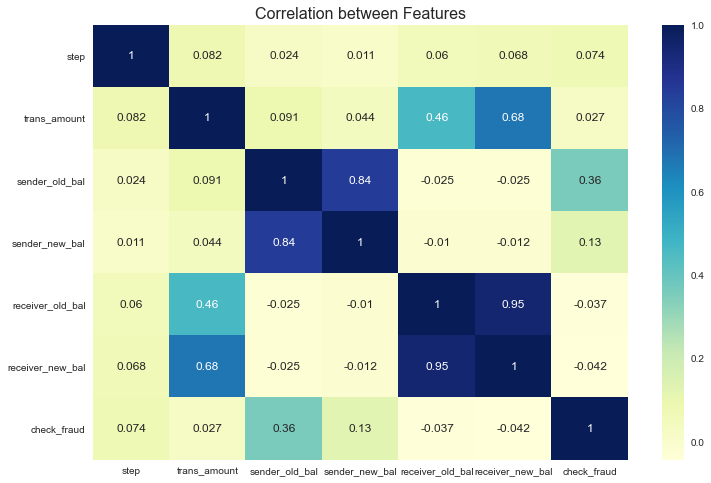

In [39]:
figure = plt.figure(figsize = [12, 8])
sns.heatmap(data = data_transfer.corr(), annot = True, cmap = 'YlGnBu')
plt.title('Correlation between Features', size = 16)
plt.show()

**Observation:**

* **trans_amount** and **receiver_new_bal** feature seems to be **moderately** **correlated**.
* **sender_old_bal** and **sender_new_bal** feature seems to be **highly** **correlated**.
* **receiver_old_bal** and **receiver_new_bal** feature seems to be **highly** **correlated** as well.

**<h4>Question 7:** How much **money** has been **laundered at different amounts of chunks**?</h4>

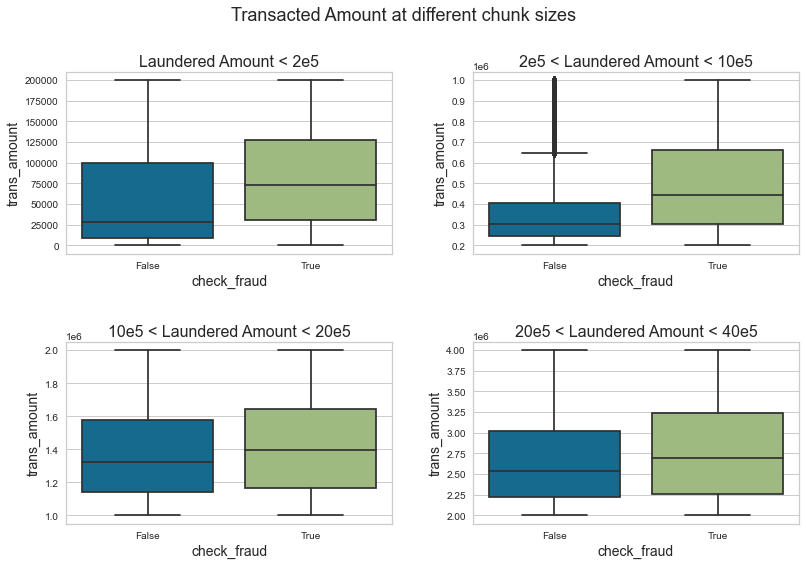

In [40]:
figure = plt.figure(figsize = [12, 8])
plt.subplot(2, 2, 1)
sns.boxplot(x = 'check_fraud', y = 'trans_amount', data = data[data['trans_amount'] < 2e5])
plt.xlabel('check_fraud', size = 14)
plt.ylabel('trans_amount', size = 14)
plt.title('Laundered Amount < 2e5', size = 16)

plt.subplot(2, 2, 2)
sns.boxplot(x = 'check_fraud', y = 'trans_amount', data = data[(data['trans_amount'] > 2e5) & (data['trans_amount'] < 10e5)])
plt.xlabel('check_fraud', size = 14)
plt.ylabel('trans_amount', size = 14)
plt.title('2e5 < Laundered Amount < 10e5', size = 16)

plt.subplot(2, 2, 3)
sns.boxplot(x = 'check_fraud', y = 'trans_amount', data = data[(data['trans_amount'] > 10e5) & (data['trans_amount'] < 20e5)])
plt.xlabel('check_fraud', size = 14)
plt.ylabel('trans_amount', size = 14)
plt.title('10e5 < Laundered Amount < 20e5', size = 16)

plt.subplot(2, 2, 4)
sns.boxplot(x = 'check_fraud', y = 'trans_amount', data = data[(data['trans_amount'] > 20e5) & (data['trans_amount'] < 40e5)])
plt.xlabel('check_fraud', size = 14)
plt.ylabel('trans_amount', size = 14)
plt.title('20e5 < Laundered Amount < 40e5', size = 16)

plt.suptitle('Transacted Amount at different chunk sizes', size = 18, y = 1.02)
plt.tight_layout(pad = 3.0)
plt.show()

**Observation:**

- We can see that the **median values of being fraud are high than the median values of not fraud**. 
- But we're **not** able to make any **much inference** so let's explore further.

**<h4>Question 8:** What is the **minimum & maximum amount of sender's old balance with respect to being fraudulent or not**?</h4>

In [0]:
print('(check_fraud = 1, Min):', data_transfer[data_transfer['check_fraud'] == 1]['sender_old_bal'].min())
print('(check_fraud = 1, Max):', data_transfer[data_transfer['check_fraud'] == 1]['sender_old_bal'].max())
print('(check_fraud = 0, Min):', data_transfer[data_transfer['check_fraud'] == 0]['sender_old_bal'].min())
print('(check_fraud = 0, Max):', data_transfer[data_transfer['check_fraud'] == 0]['sender_old_bal'].max())

(check_fraud = 1, Min): 0.0
(check_fraud = 1, Max): 59585040.37
(check_fraud = 0, Min): 0.0
(check_fraud = 0, Max): 25908675.06


**Observation:**

We saw that in TRANSFER type of data - 
- **(Non-Fraudulent)**: The **minimum amount** of sender side was **0** while **maximum amount** was **~26 million dollars**.
- **(Fraudulent)**: The **minimum amount** of sender side was **0** while **maximum amount was ~59 million dollars**.

In the **next section** we will analyze the data around **merchant** and **customer** & how fraudster commited fruad.

<a id = Section62></a>
## **6.2 Customer & Merchant Transactional Analysis**

**<h4>Question 1: Have** the **receiver side** of transactions been **flagged as fraud inititated by other transactions**?</h4>

In [41]:
print(data_flagged['receiver'].isin(data_notflagged['sender_name']).any())
print(data_flagged['receiver'].isin(data_notflagged['sender_name']).sum())

True
18


**Observation:**

- It turns out that **there are 18 such transactions** that have been marked fraudulent initiated by other transactions.

**<h4>Question 2:** How many **receiver side of transactions** have been **flagged as fraud more than once**?</h4>

In [42]:
total_freq = data_flagged['receiver'].isin(data_notflagged['receiver']).sum()
percent = total_freq/len(data_flagged)
print('Total Transactions:', total_freq)
print('%age:', np.round(percent, decimals=3)*100, '%')

Total Transactions: 5532
%age: 67.4 %


**Observation:**

- Around **67.4%** of flagged **transactions** are in **not flagged** data on the **receiver side** of the transactions.

**<h4>Question 3:** Are there any **merchants among sender** accounts **for CASH_IN transactions**?</h4>

In [43]:
print(data[data['trans_type'] == 'CASH_IN']['sender_name'].str.contains('M').any())

False


**Observation:**

- It turns out that **there aren't any** transactions with **merchant** with **CASH_IN** type on **sender** side.



**<h4>Question 4:** Are there **any sender & receiver accounts among merchants for each type of transaction**?</h4>

In [44]:
print('-----CASH_OUT-----')
print('Sender side?', data[data['trans_type'] == 'CASH_OUT']['sender_name'].str.contains('M').any())
print('Receiver side?', data[data['trans_type'] == 'CASH_OUT']['receiver'].str.contains('M').any())

print('-----CASH_IN-----')
print('Sender side?', data[data['trans_type'] == 'CASH_IN']['sender_name'].str.contains('M').any())
print('Receiver side?', data[data['trans_type'] == 'CASH_IN']['receiver'].str.contains('M').any())

print('-----DEBIT-----')
print('Sender side?', data[data['trans_type'] == 'DEBIT']['sender_name'].str.contains('M').any())
print('Receiver side?', data[data['trans_type'] == 'DEBIT']['receiver'].str.contains('M').any())

print('-----TRANSFER-----')
print('Sender side?', data[data['trans_type'] == 'TRANSFER']['sender_name'].str.contains('M').any())
print('Receiver side?', data[data['trans_type'] == 'TRANSFER']['receiver'].str.contains('M').any())

print('-----PAYMENT-----')
print('Sender side?', data[data['trans_type'] == 'PAYMENT']['sender_name'].str.contains('M').any())
print('Receiver side?', data[data['trans_type'] == 'PAYMENT']['receiver'].str.contains('M').any())

-----CASH_OUT-----
Sender side? False
Receiver side? False
-----CASH_IN-----
Sender side? False
Receiver side? False
-----DEBIT-----
Sender side? False
Receiver side? False
-----TRANSFER-----
Sender side? False
Receiver side? False
-----PAYMENT-----
Sender side? False
Receiver side? True


**Observation:**

- There are **no merchants present among sender & receiver** accounts for each type of transactions. 
- Merchants are **only present in destination** accounts for all **PAYMENTS**.

**<h4>* Question 5:** Is there **any merchant present in the receiver account except the PAYMENT type**?</h4>

In [0]:
print((data.loc[data['receiver'].str.contains('M')]['trans_type'] != 'PAYMENT').any())

False


In [45]:
print('-----CASH_OUT (Fruad = 1)-----')
print('Sender side?', data[(data['trans_type'] == 'CASH_OUT') & data['check_fraud'] == 1]['sender_name'].str.contains('M').any())
print('Receiver side?', data[(data['trans_type'] == 'CASH_OUT') & data['check_fraud'] == 1]['receiver'].str.contains('M').any())

print('\n-----CASH_OUT (Fraud = 0)-----')
print('Sender side?', data[(data['trans_type'] == 'CASH_OUT') & data['check_fraud'] == 0]['sender_name'].str.contains('M').any())
print('Receiver side?', data[(data['trans_type'] == 'CASH_OUT') & data['check_fraud'] == 0]['receiver'].str.contains('M').any())

-----CASH_OUT (Fruad = 1)-----
Sender side? False
Receiver side? False

-----CASH_OUT (Fraud = 0)-----
Sender side? False
Receiver side? True


**Observation:**

- For all the transactions **among the labelled account** names **in Sender** and **Receiver**, the **merchant, transaction doesn't show any relationship**.
- From the data, it could be easily visualized that **fraud is commited by TRANSFER and CASH_OUT type of transactions**. 
- **CASH_OUT is done by transacting with a merchant who pays out cash**.
- The **fraudulent account would be both**, the **receiver in a TRANSFER** and the **sender in a CASH_OUT**. 

In [46]:
data[(data['trans_type'] == 'TRANSFER') & data['check_fraud'] == 1].head()

,step,trans_type,trans_amount,sender_name,sender_old_bal,sender_new_bal,receiver,receiver_old_bal,receiver_new_bal,check_fraud
2,1.0,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,True
251,1.0,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,True
680,1.0,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,True
969,1.0,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,True
1115,1.0,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,True


In [47]:
data[(data['trans_type'] == 'CASH_OUT') & data['check_fraud'] == 1].head()

,step,trans_type,trans_amount,sender_name,sender_old_bal,sender_new_bal,receiver,receiver_old_bal,receiver_new_bal,check_fraud
3,1.0,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,True
252,1.0,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,True
681,1.0,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,True
724,1.0,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.0,9291619.62,True
970,1.0,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,True


In [48]:
data_trans_fraud = data[(data['trans_type'] == 'TRANSFER') & (data['check_fraud'] == 1)]
data_cashout_fraud = data[(data['trans_type'] == 'CASH_OUT') & (data['check_fraud'] == 1)]
print(data_trans_fraud['receiver'].isin(data_cashout_fraud['sender_name']).any())

False


**Observation:**

- It turns out that **there aren't any transactions** that receiver of TRANSFER is present in the sender of the CASH_OUT type.

**<h4>* Question 7:** Were there **any accounts in receiver side** of **TRANSFER type** transactions which were **originator for CASH_OUT** type transactions **that were genuine** & unable to detect **at begining but later were found fraudulent**?</h4>

<center><img src = "https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Finance/Question/question%206.8.png"></center>



In [0]:
notFraud = data.loc[data['check_fraud'] == 0]
isFraud = data.loc[data['check_fraud'] == 1]
data_trans_fraud.loc[data_trans_fraud['receiver'].isin(notFraud.loc[notFraud['trans_type'] == 'CASH_OUT']['sender_name'])]

,step,trans_type,trans_amount,sender_name,sender_old_bal,sender_new_bal,receiver,receiver_old_bal,receiver_new_bal,check_fraud
1030443,65,TRANSFER,1282971.57,C1175896731,1282971.57,0.0,C1714931087,0.0,0.0,True
6039814,486,TRANSFER,214793.32,C2140495649,214793.32,0.0,C423543548,0.0,0.0,True
6362556,738,TRANSFER,814689.88,C2029041842,814689.88,0.0,C1023330867,0.0,0.0,True


**Observation:**

- It turns out there are **3 such transactions**. 
- However, **2 out of 3 of these accounts first make a genuine CASH_OUT and later receives a fraudulent TRANSFER**. 


In [0]:
# To check whether prior transaction was fraud
isFraud.loc[(isFraud['trans_type'] == 'CASH_OUT') & (isFraud['sender_name'] == 'C1714931087')]

,step,trans_type,trans_amount,sender_name,sender_old_bal,sender_new_bal,receiver,receiver_old_bal,receiver_new_bal,check_fraud


In [0]:
# To check whether prior transaction was not fraud
notFraud.loc[(notFraud['trans_type'] == 'CASH_OUT') & (notFraud['sender_name'] == 'C1714931087')]

,step,trans_type,trans_amount,sender_name,sender_old_bal,sender_new_bal,receiver,receiver_old_bal,receiver_new_bal,check_fraud
6149940,546,CASH_OUT,18091.05,C1714931087,197227.0,179135.95,C1339132632,66177.84,84268.89,False


**Observation for [1030443]:**
- As we see prior for C1714931087 there wasn't any transaction happened. It is originally marked as fraudulent at very first time.

- We can also see that later down the very first transaction for CASH_OUT type after step of 65, it happened at step 546.

In [0]:
notFraud.loc[(notFraud['trans_type'] == 'CASH_OUT') & (notFraud['sender_name'] == 'C423543548')]

,step,trans_type,trans_amount,sender_name,sender_old_bal,sender_new_bal,receiver,receiver_old_bal,receiver_new_bal,check_fraud
2186261,185,CASH_OUT,214555.85,C423543548,0.0,0.0,C1066927674,4575179.83,4789735.69,False


In [0]:
notFraud.loc[(notFraud['trans_type'] == 'CASH_OUT') & (notFraud['sender_name'] == 'C1023330867')]

,step,trans_type,trans_amount,sender_name,sender_old_bal,sender_new_bal,receiver,receiver_old_bal,receiver_new_bal,check_fraud
1168398,132,CASH_OUT,29084.28,C1023330867,51999.0,22914.72,C1422447255,0.0,29084.28,False


**Observation for [6039814 & 6362556]:**

- **Fraudulent** **TRANSFER to C423543548** occurred **at step = 486** whereas genuine **CASH_OUT from this account occurred earlier at step = 185**
- **Fraudulent TRANSFER to C1023330867 occurred at step = 738** whereas genuine **CASH_OUT** **from this account occurred earlier at step = 132**

<a id = Section7></a>
# **7. Post Data Processing & Analysis**

- From the above analysis we can see that **fraud occur only in TRANSFER and CASH_OUT** type of transactions. 
- So we **assemble only** the corresponding data i.e. for **TRANSFER** and **CASH_OUT** type of **transactions**. 
- We will **eliminate** the **sender_name**, **receiver** from the data as it is **irrelevant** as evident from the above analysis.

In [49]:
data_1 = data.loc[(data['trans_type'] == 'TRANSFER') | (data['trans_type'] == 'CASH_OUT')].drop(['sender_name', 'receiver'], axis = 1)
print('Old Data Shape:', data.shape)
print('New Data Shape:', data_1.shape)
data_1.head()

Old Data Shape: (6362620, 10)
New Data Shape: (2770409, 8)


,step,trans_type,trans_amount,sender_old_bal,sender_new_bal,receiver_old_bal,receiver_new_bal,check_fraud
2,1.0,TRANSFER,181.00,181.0,0.0,0.0,0.00,True
3,1.0,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,True
15,1.0,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,False
19,1.0,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,False
24,1.0,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,False


**Observation:**

- We filtered out our data to **TRANSFER** and **CASH_OUT** type and now we'll work on this data.

In [50]:
# Let's create two dataframe that contains fraudulent as well as non-fraudulent transactions
dataFraud = data_1[data_1['check_fraud'] == 1]
dataNotFraud = data_1[data_1['check_fraud'] == 0]
print('Fraud Data Shape:', dataFraud.shape)
print('Non-Fraud Data Shape:', dataNotFraud.shape)

Fraud Data Shape: (8213, 8)
Non-Fraud Data Shape: (2762196, 8)


**The data has several transactions with zero balances in the sender's account both before and after a non-zero amount is transacted**. 

In [51]:
value1 = len(dataFraud.loc[(dataFraud['sender_old_bal'] == 0) & (dataFraud['sender_new_bal'] == 0) & (dataFraud['trans_amount'])]) / (1.0 * len(dataFraud))
print('The fraction of fraudulent transactions with sender_old_bal = sender_new_bal = 0 although the transacted amount is non-zero is:', np.round(value1, 4))

value2 = len(dataNotFraud.loc[(dataNotFraud['sender_old_bal'] == 0) & (dataNotFraud['sender_new_bal'] == 0) & (dataNotFraud['trans_amount'])]) / (1.0 * len(dataNotFraud))
print('\nThe fraction of genuine transactions with sender_old_bal = sender_new_bal = 0 although the transacted amount is non-zero is:', np.round(value2, 4))

The fraction of fraudulent transactions with sender_old_bal = sender_new_bal = 0 although the transacted amount is non-zero is: 0.003

The fraction of genuine transactions with sender_old_bal = sender_new_bal = 0 although the transacted amount is non-zero is: 0.4737


**Observation:**




- **Genuine Data (sender_old_bal = sender_new_bal = 0)**: 
 - We can see that **genuine transactions contains ~47% of zeros**. 
 - **As** our **data** is already **oversampled with genuine majority** class, **we can drop these records** by first replacing 0s with null.
- **Fraudulent Data (sender_old_bal = sender_new_bal = 0)**: 
 - We can see that the **fraudulent transactions contain only 0.3% of zeros**. 
 - We **shall** also **replace this value with null and** later on **drop** these records and **analyze how much data we lost** for fraudulent data.


In [52]:
# Replacing 0s with NaN values
data_1.loc[(data_1['sender_old_bal'] == 0) & (data_1['sender_new_bal'] == 0) & (data_1['trans_amount'] != 0), ['sender_old_bal', 'sender_new_bal']] = np.nan

**The data also has several transactions with zero balances in the destination account both before and after a non-zero amount is transacted**.

In [53]:
value1 = len(dataFraud.loc[(dataFraud['receiver_old_bal'] == 0) & (dataFraud['receiver_new_bal'] == 0) & (dataFraud['trans_amount'])]) / (1.0 * len(dataFraud))
print('The fraction of fraudulent transactions with receiver_old_bal = receiver_new_bal = 0 although the transacted amount is non-zero is:', np.round(value1, 4))

value2 = len(dataNotFraud.loc[(dataNotFraud['receiver_old_bal'] == 0) & (dataNotFraud['receiver_new_bal'] == 0) & (dataNotFraud['trans_amount'])]) / (1.0 * len(dataNotFraud))
print('\nThe fraction of genuine transactions with receiver_old_bal = receiver_new_bal = 0 although the transacted amount is non-zero is:', np.round(value2, 4))

The fraction of fraudulent transactions with receiver_old_bal = receiver_new_bal = 0 although the transacted amount is non-zero is: 0.4956

The fraction of genuine transactions with receiver_old_bal = receiver_new_bal = 0 although the transacted amount is non-zero is: 0.0006


**Observation:**
 
 * The fraction of empty transactions, **where zero likely denotes a missing value, is much larger in fraudulent (50%) compared to genuine transactions (0.06%)**. 
 * **Receiver** account **balances being zero** is a **strong indicator of fraud** and **if** we **keep** it as it is, **machine will mask** the indicator of **fraud** and mark fraudulent transactions appear genuine.

* Instead, below we **replace** the value of **0 with -1** which will be **more useful to a suitable machine-learning** (ML) algorithm detecting fraud.

In [54]:
# Replacing 0s with -1 for fraud identification by machine
data_1.loc[(data_1['receiver_old_bal'] == 0) & (data_1['receiver_new_bal'] == 0) & (data_1['trans_amount'] != 0), ['receiver_old_bal', 'receiver_new_bal']] = - 1

### **Identifying & Handling NaN valued transactions**

In [55]:
null_frame = pd.DataFrame(data_1.isnull().sum(), columns = ['Frequency'])
null_frame.transpose()

,step,trans_type,trans_amount,sender_old_bal,sender_new_bal,receiver_old_bal,receiver_new_bal,check_fraud
Frequency,0,0,0,1308566,1308566,0,0,0


### **Dropping all rows containing NaN values on sender_old_bal  and sender_new_bal features.**

In [56]:
print('Old Data Shape:', data_1.shape)
data_1.dropna(axis = 0, inplace = True)
print('New Data Shape: ', data_1.shape)
null_frame = pd.DataFrame(data_1.isnull().sum(), columns = ['Frequency'])
null_frame.transpose()

Old Data Shape: (2770409, 8)
New Data Shape:  (1461843, 8)


,step,trans_type,trans_amount,sender_old_bal,sender_new_bal,receiver_old_bal,receiver_new_bal,check_fraud
Frequency,0,0,0,0,0,0,0,0


### **Feature Extraction**

We will **create two more features** which will be **helpful** in **analyzing performance of machine learning algorithms**.

In [57]:
data_1['errorBalanceSender'] = data_1['sender_new_bal'] + data_1['trans_amount'] - data_1['sender_old_bal']
data_1['errorBalanceReceiver'] = data_1['receiver_old_bal'] + data_1['trans_amount'] - data_1['receiver_new_bal']
print('New Data Shape:', data_1.shape)

New Data Shape: (1461843, 10)


### **Post Profiling Report**

In [0]:
# profile = ProfileReport(data_1)
# profile.to_file(outputfile = 'Post Profiling Report.html')
# print('Profiling Accomplished!')

**Observation:**

- **trans_amount** is still **highly** **skewed**.
- **sender_old_bal contains 30% of zeros**.
- **sender_new_bal** is **highly correlated** with **sender_old_bal** (rejected).
- **receiver_old_bal contains** around **42% of zeros**.
- **receiver_new_bal** is **highly correlated** with receiver_old_bal (rejected).

### **Data Splitting**

Now we will **split our data** for input(Predictors) and output(Target) and simultaneously encode the trans_type feature with respective values i.e. 0 and 1.

In [58]:
# Data Split for Predictors and Target
X = data_1.drop('check_fraud', axis = 1)
y = data_1['check_fraud']

print('X Shape:', X.shape)
print('y Shape:', y.shape)

# Encoding transaction type to 0 and 1
X.loc[X['trans_type'] == 'TRANSFER', 'trans_type'] = 0
X.loc[X['trans_type'] == 'CASH_OUT', 'trans_type'] = 1
X.trans_type = X.trans_type.astype('int')

X Shape: (1461843, 9)
y Shape: (1461843,)


It is **best to analyze your data with fraudulent and genuine transactions**. So we'll do it in the following parts.

In [59]:
X.head()

,step,trans_type,trans_amount,sender_old_bal,sender_new_bal,receiver_old_bal,receiver_new_bal,errorBalanceSender,errorBalanceReceiver
2,1.0,0,181.00,181.0,0.0,-1.0,-1.00,0.00,181.0
3,1.0,1,181.00,181.0,0.0,21182.0,0.00,0.00,21363.0
15,1.0,1,229133.94,15325.0,0.0,5083.0,51513.44,213808.94,182703.5
19,1.0,0,215310.30,705.0,0.0,22425.0,0.00,214605.30,237735.3
24,1.0,0,311685.89,10835.0,0.0,6267.0,2719172.89,300850.89,-2401220.0


### **Feature Analysis (Pattern Analysis)**
We will create a function to **visualize** the data for **fraudulent** and **non-fraudulent transactions** of our potential features.

In [0]:
def plotStrip(x, y, hue, ylabel, title):
  '''
  A function to analyze pattern for frauduent and non-fraudulent data.
  x : Target feature
  y : Numerical feature
  hue: Categorical feature
  ylabel: ylabel of graph
  title: Title of graph
  '''
  fig = plt.figure(figsize = [13.66, 7.68])
  with sns.axes_style('ticks'):
    ax = sns.stripplot(x, y, hue = hue, jitter = 0.4, marker = '.', size = 4, palette = ["#E8000B", '#56D3DB'])
    ax.set_xlabel('')
    ax.set_ylabel(ylabel, size = 14)
    ax.set_title(title, size = 16)
    ax.set_xticklabels(['Genuine', 'Fraudulent'], size = 14)
    for axis in ['top','bottom','left','right']:
      ax.spines[axis].set_linewidth(2)
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles, ['TRANSFER', 'CASH_OUT'], bbox_to_anchor = (1, 1), loc = 2, borderaxespad = 0, fontsize = 16)
  return ax

**<h4>Pattern 1**: Pattern Analysis on **fraudulent and non-fraudulent** transaction with respect to **time** (steps).</h4>
- We shall see how fraudluent and non-fraudulent transactions behave with transactions of **TRANSFER (Red dot)** and **CASH_OUT(Blue dot)**.

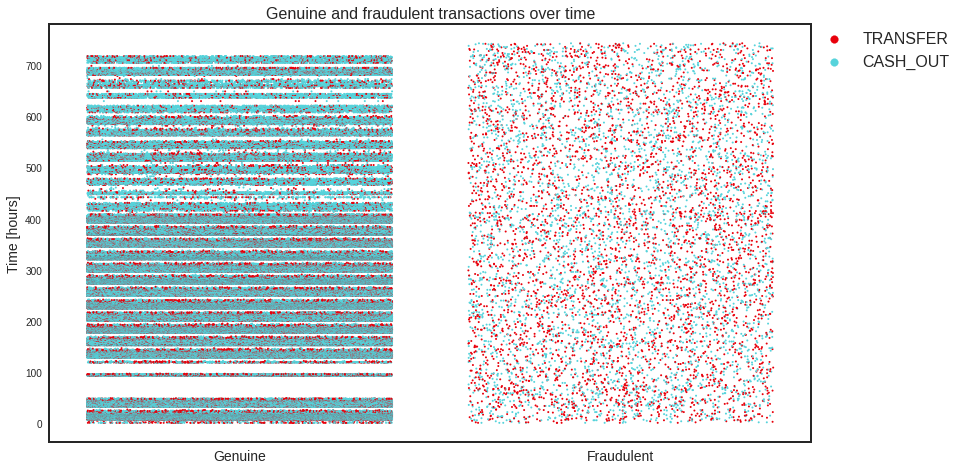

In [0]:
# Have some patience, might take some time :)
limit = len(X)
X_data = y[:limit]
Y_data = X['step'][:limit]
HUE = X['trans_type'][:limit]
YLABEL = 'Time [hours]'
TITLE = 'Genuine and fraudulent transactions over time'

plotStrip(x = X_data, y = Y_data, hue = HUE, ylabel = YLABEL, title = TITLE)
plt.show()

**Observation:**

- For **Genuine transactions** we can see that **TRANSFER type** of transactions have **occured less than the CASH_OUT type** of transactions.

- For **Fraudulent transactions** we **can't find any pattern** out of the data as the transactions have **happened in random way for both TRANSFER and CASH_OUT** type of transactions.

**<h4>Pattern 2**: Pattern Analysis on **fraudulent and non-fraudulent** transaction with respect to **transacted amount**.</h4>

 - We shall see how fraudluent and non-fraudulent transactions behave with transactions of **TRANSFER (Red dot)** and **CASH_OUT(Blue dot)**.

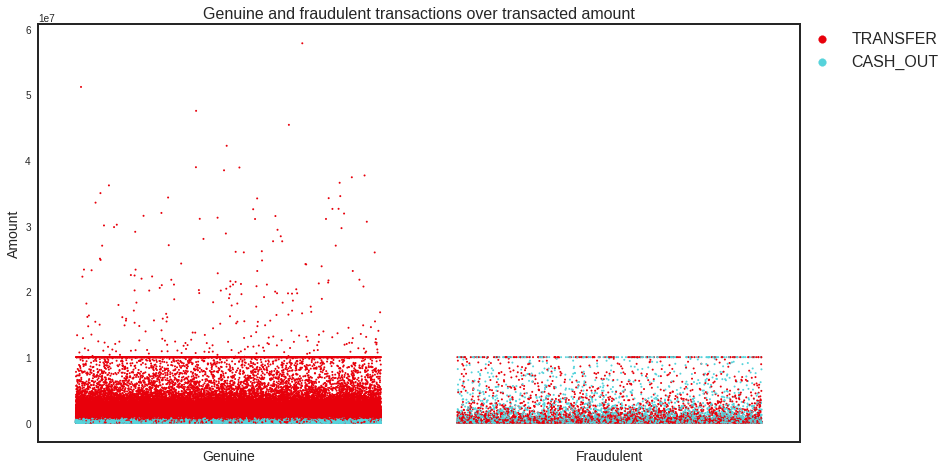

In [0]:
# Have some patience, might take some time :)
limit = len(X)
X_data = y[:limit]
Y_data = X['trans_amount'][:limit]
HUE = X['trans_type'][:limit]
YLABEL = 'Amount'
TITLE = 'Genuine and fraudulent transactions over transacted amount'

plotStrip(x = X_data, y = Y_data, hue = HUE, ylabel = YLABEL, title = TITLE)
plt.show()

**Observation:**

- We can see the **pattern at 10 million for both genuine and fraudulent transactions**.

- **After 10 million** dollars **there is random spread** of data **for TRANSFER type**.

- We can see that **for non-fraudulent transactions TRANSFER type** transactions have **happened more than the CASH_OUT**.

- For **non-fraudulent transactions around 10 million amount is more densed** for **TRANSFER type**.

- For **fraudulent transactions** we can **see the random spread for both** TRANSFER & CASH_OUT type transactions.

**<h4>Pattern 3**: Pattern Analysis on **fraudulent and non-fraudulent** transaction with respect to **error in receivers account**.</h4>

- We shall see how fraudluent and non-fraudulent transactions behave with transactions of **TRANSFER (Red dot)** and **CASH_OUT(Blue dot)**.

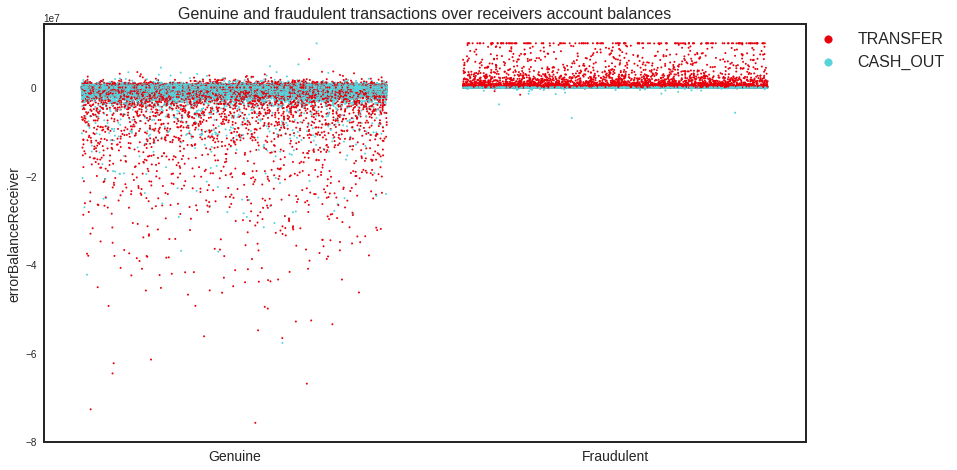

In [0]:
# Have some patience, might take some time :)
limit = len(X)
X_data = y[:limit]
Y_data = X['errorBalanceReceiver'][:limit]
HUE = X['trans_type'][:limit]
YLABEL = 'errorBalanceReceiver'
TITLE = 'Genuine and fraudulent transactions over receivers account balances'

plotStrip(x = X_data, y = Y_data, hue = HUE, ylabel = YLABEL, title = TITLE)
plt.show()

**Observation:**

- **Receivers error amount for genuine CASH_OUT is more than the fraudulent CASH_OUT.**

- **Receivers error amount for genuine TRANSFER type is randomly spread while for fraudulent TRANSFER type is more densed above 0.**

### **Correlation between Fraudulent & Non-Fraudulent Data**

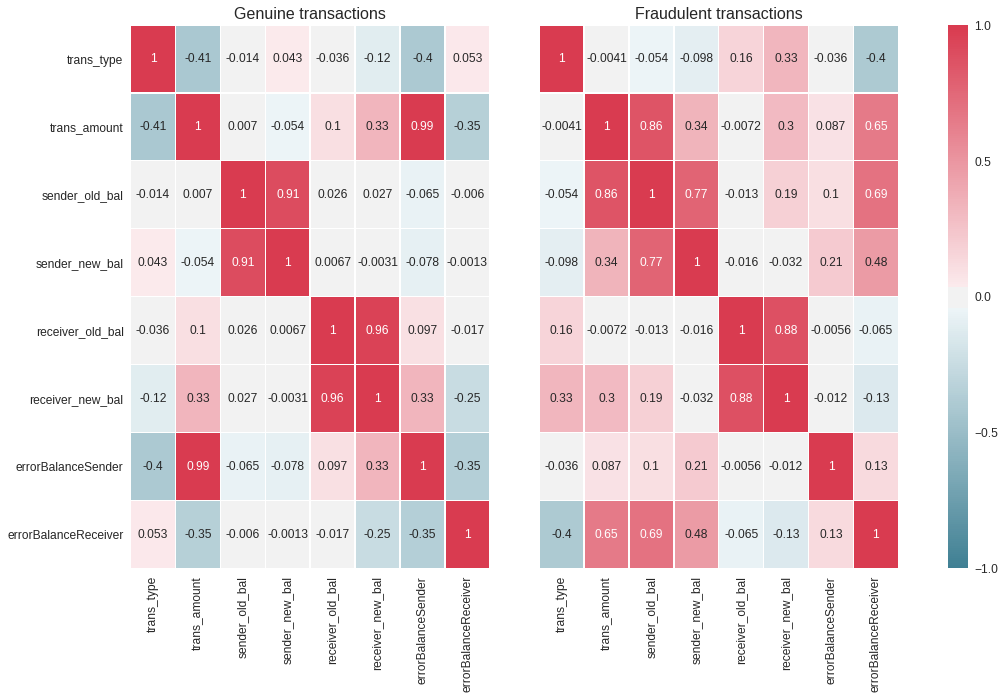

In [0]:
# Update Xfraud & XnonFraud with cleansed data
Xfraud = X.loc[y == 1] 
XnonFraud = X.loc[y == 0]

correlationNonFraud = XnonFraud.loc[:, X.columns != 'step'].corr()
correlationFraud = Xfraud.loc[:, X.columns != 'step'].corr()

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
fig, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw = grid_kws, figsize = [15, 10])
cmap = sns.diverging_palette(220, 8, as_cmap=True)
                             
ax1 = sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, cmap = cmap, square = False, linewidths = 0.5, cbar = False, annot = True)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 12)
ax1.set_yticklabels(ax1.get_yticklabels(), size = 12)
ax1.set_title('Genuine transactions', size = 16)

ax2 = sns.heatmap(correlationFraud, ax = ax2, vmin = -1, vmax = 1, cmap = cmap, square = False, linewidths = 0.5, annot = True, 
                  yticklabels = False,  cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical',  'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 12) 
ax2.set_title('Fraudulent transactions', size = 16)

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 12)
plt.show()

**Observation:**

- Genuine Data:
 - **trans_amount** is **highly correlated** with **errorBalanceSender**.

 - **sender_old_bal** is **highly correlated** with **sender_new_bal**.

 - **receiver_old_bal** is **highly correlated** with **receiver_new_bal**.

- Fraudulent Data:
 - **trans_amount** is **highly correlated** with **sender_old_bal**.

 - **sender_old_bal** is **moderately correlated** with **sender_new_bal**.

 - **receiver_old_bal** is **moderately correlated** with **receiver_new_bal**.

 - **errorBalanceReceiver** is **moderately correalted** with **sender_old_bal and trans_amount**.

<a id = Section8></a>
# **8. Model Development & Evaluation**

In [0]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (1169474, 9) (1169474,)
Testing Data Shape: (292369, 9) (292369,)


**Note:**

- As our **data is highly imbalanced**, a **common approach** of **discarding** the **minority class** data would be good **but** along with that our potential **information will** also get **lost**. 

- An **alternative** would be **oversampling the minority class** using SMOTE (**Synthetic Minority Oversampling Technique**) present in python library known as **imbalanced-learn**.  

- But we will **continue with the original cleansed data** and perform model building. At the end we will **feed this data to extreme gradient boosting** algorithm as it **will automatically** give equal weightage across classes to **handle** **class imbalance**.

We will create a **function** that will **plot precision-recall curve** to evaluate our model performance.

In [0]:
def PRCurve(model):
  '''
  A function to compute Precision Recall Curve
  Data to fit must be training i.e. X_train, y_train
  Data score will be estimated on X_test, y_test
  '''
  viz = PrecisionRecallCurve(model)
  viz.fit(X_train, y_train)
  avg_prec = viz.score(X_test, y_test)
  plt.legend(labels = ['Binary PR Curve',"AP=%.3f"%avg_prec], loc = 'lower right', prop={'size': 14})
  plt.xlabel(xlabel = 'Recall', size = 14)
  plt.ylabel(ylabel = 'Precision', size = 14)
  plt.title(label = 'Precision Recall Curve', size = 16)

<a id = Section81></a>
## **8.1 Baseline Models**

<a id = Section811></a>
### **8.1.1 Logisitc Regression**

Accuracy Score (Train Data): 0.994
Accuracy Score (Test Data): 0.994
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    290731
        True       0.48      0.41      0.44      1638

    accuracy                           0.99    292369
   macro avg       0.74      0.70      0.72    292369
weighted avg       0.99      0.99      0.99    292369



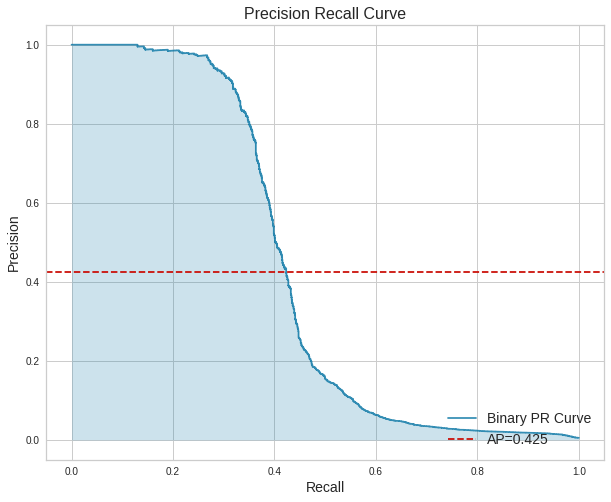

In [0]:
# Have some patience, might take some time :)
log  = LogisticRegression(random_state = 42)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

print('Accuracy Score (Train Data):', np.round(log.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(log.score(X_test, y_test), decimals = 3))

base_logistic_report = classification_report(y_test, y_pred)
print(base_logistic_report)

plt.figure(figsize = [10, 8])
PRCurve(model = log)
plt.show()

**Observation:**

- We can see that **model performed 99% accurate** because the **data is imbalanced**. 
- The model is **more biased towards majority class**.
- The **average precision score is also not satisfactory**.
- We shall see how Decision Tree will behave in next part.

<a id = Section812></a>
### **8.1.2 Decision Tree Classifier**

Accuracy Score (Train Data): 0.998
Accuracy Score (Test Data): 0.998
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    290731
        True       0.99      0.67      0.80      1638

    accuracy                           1.00    292369
   macro avg       1.00      0.84      0.90    292369
weighted avg       1.00      1.00      1.00    292369



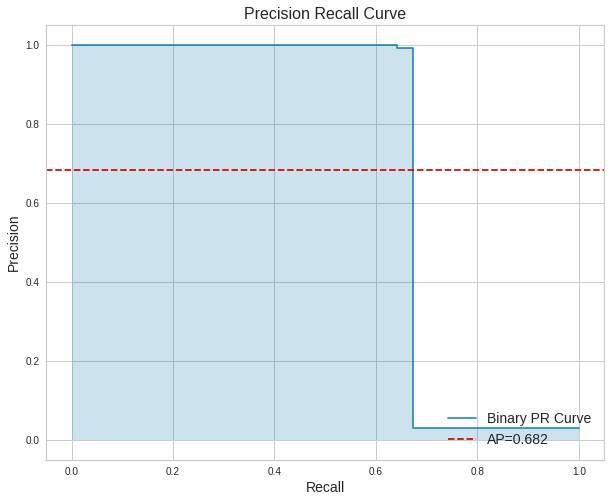

In [0]:
# Have some patience, might take some time :)
dtc = DecisionTreeClassifier(random_state = 42, max_depth = 5)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print('Accuracy Score (Train Data):', np.round(dtc.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(dtc.score(X_test, y_test), decimals = 3))

base_decision_tree_report = classification_report(y_test, y_pred)
print(base_decision_tree_report)

plt.figure(figsize = [10, 8])
PRCurve(model = dtc)
plt.show()

**Observation:**

- It turns out that there's **no significant change in accuracy**.
- **Precision, Recall has improved** but **not that much**.
- The **average precision** has also **improved with 68%**.

<a id = Section813></a>
### **8.1.3 Random Forest Classifier**

Accuracy Score (Train Data): 0.998
Accuracy Score (Test Data): 0.998
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    290731
        True       1.00      0.67      0.80      1638

    accuracy                           1.00    292369
   macro avg       1.00      0.84      0.90    292369
weighted avg       1.00      1.00      1.00    292369



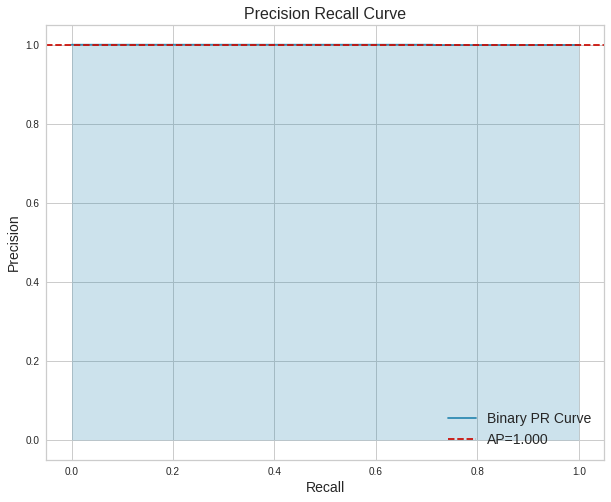

In [0]:
# Have some patience, might take some time :)
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42, n_jobs = -1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print('Accuracy Score (Train Data):', np.round(rfc.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(rfc.score(X_test, y_test), decimals = 3))

base_random_forest_report = classification_report(y_test, y_pred)
print(base_random_forest_report)

plt.figure(figsize = [10, 8])
PRCurve(model = rfc)
plt.show()

**Observation:**

- **Precision for minority class has improved** but the **recall is still low**.
- **F1 score** for **minority class** has also **improved** but still not good.
- **Average precision** has **imporoved significantly** to **100%**.
- But we will see if **we can further improve** this development.
- In **next** part we shall **observe** how **XGBoost** will work.

<a id = Section814></a>
### **8.1.4 Extreme Gradient Boosting Classifier**

Accuracy Score (Train Data): 1.0
Accuracy Score (Test Data): 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    290731
        True       1.00      1.00      1.00      1638

    accuracy                           1.00    292369
   macro avg       1.00      1.00      1.00    292369
weighted avg       1.00      1.00      1.00    292369



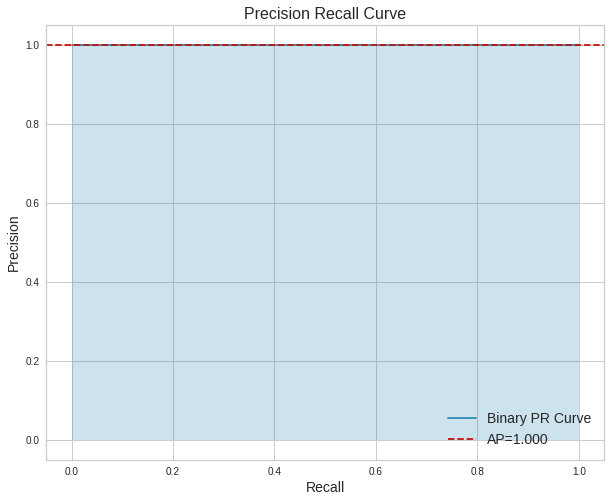

In [0]:
# Have some patience, might take some time :)
base_clf = XGBClassifier(max_depth = 5, n_jobs = -1, random_state = 42)
base_clf.fit(X_train, y_train)
y_pred = base_clf.predict(X_test)

print('Accuracy Score (Train Data):', np.round(base_clf.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(base_clf.score(X_test, y_test), decimals = 3))

base_XGB_report = classification_report(y_test, y_pred)
print(base_XGB_report)

plt.figure(figsize = [10, 8])
PRCurve(model = base_clf)
plt.show()

**Observation:**

- Wonderful!, we can see much improvement over all the metrics.
- **Precision, Recall and F1 score has improved at ~100%**.
- Seems like **we hit a jackpot**.

<a id = Section82></a>
## **8.2 Oversampling Models**

#### **SMOTE Technique & its Implementation**

- SMOTE refers to **Synthetic Minority Oversampling Technique**.
- It **aims** to **balance class distribution** by **randomly** **increasing minority class** examples **by replicating** them. 
- It **synthesises** **new minority instances** **between** **existing** minority **instances**. 
- **It generates the virtual training records by linear interpolation for the minority class.** 
- These **synthetic training records are generated by randomly selecting** one or more of the k-nearest neighbors for each **example in the minority class**. 
- **After** the **oversampling process**, the **data is reconstructed** and several classification models can be applied for the processed data.

**Before Implimenting SMOTE**

In [0]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (1169474, 9) (1169474,)
Testing Data Shape: (292369, 9) (292369,)


**Performing SMOTE Operation**

In [0]:
# Have some patience, may take some time

sm = SMOTE(random_state = 42, ratio = 1)
X1, y1 = sm.fit_sample(X, y)

X_new = pd.DataFrame(data = X1, columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_new, y1, test_size = 0.2, random_state = 42, stratify = y1)

**After Implimenting SMOTE**

In [0]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (2325848, 9) (2325848,)
Testing Data Shape: (581462, 9) (581462,)


<a id = Section821></a>
### **8.2.1 Logistic Regression**

Accuracy Score (Train Data): 0.921
Accuracy Score (Test Data): 0.921
              precision    recall  f1-score   support

       False       0.97      0.87      0.92    290731
        True       0.88      0.97      0.92    290731

    accuracy                           0.92    581462
   macro avg       0.93      0.92      0.92    581462
weighted avg       0.93      0.92      0.92    581462



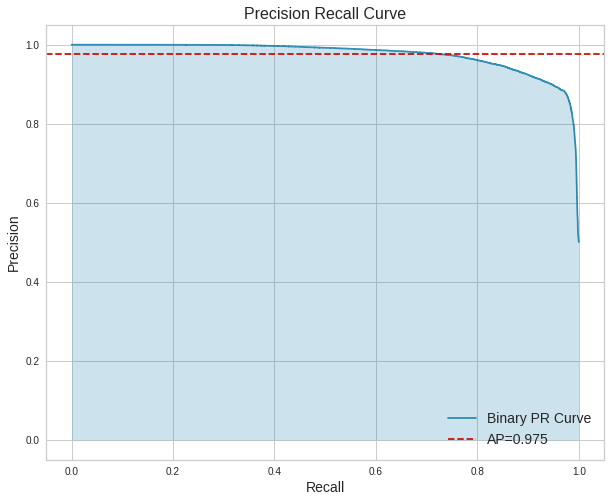

In [0]:
# Have some patience, might take some time :)
log  = LogisticRegression(random_state = 42)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

print('Accuracy Score (Train Data):', np.round(log.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(log.score(X_test, y_test), decimals = 3))

oversample_logistic_report = classification_report(y_test, y_pred)
print(oversample_logistic_report)

plt.figure(figsize = [10, 8])
PRCurve(model = log)
plt.show()

**Observation:**

- As we can see that it has **performed better than** the **basline** model.
- The **accuray** may have **dropped** to **92%** but our **average precision score** has **improved** significantly **~97.5%**.

<a id = Section822></a>
### **8.2.2 Decision Tree Classifier**

Accuracy Score (Train Data): 1.0
Accuracy Score (Test Data): 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    290731
        True       1.00      1.00      1.00    290731

    accuracy                           1.00    581462
   macro avg       1.00      1.00      1.00    581462
weighted avg       1.00      1.00      1.00    581462



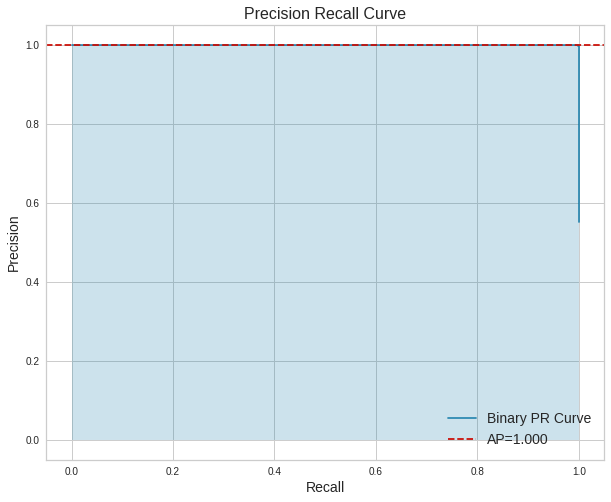

In [0]:
# Have some patience, might take some time :)
dtc = DecisionTreeClassifier(random_state = 42, max_depth = 5)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print('Accuracy Score (Train Data):', np.round(dtc.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(dtc.score(X_test, y_test), decimals = 3))

oversample_decision_tree_report = classification_report(y_test, y_pred)
print(oversample_decision_tree_report)

plt.figure(figsize = [10, 8])
PRCurve(model = dtc)
plt.show()

**Observation:**

- We can see the model achieving **100% accuracy** as well **100% average precision score** after implementing SMOTE over data.
- Well we **don't need to go further** but we can see that how random forest will behave. So let's look at it.

<a id = Section823></a>
### **8.2.3 Random Forest Classifier**

Accuracy Score (Train Data): 1.0
Accuracy Score (Test Data): 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    290731
        True       1.00      1.00      1.00    290731

    accuracy                           1.00    581462
   macro avg       1.00      1.00      1.00    581462
weighted avg       1.00      1.00      1.00    581462



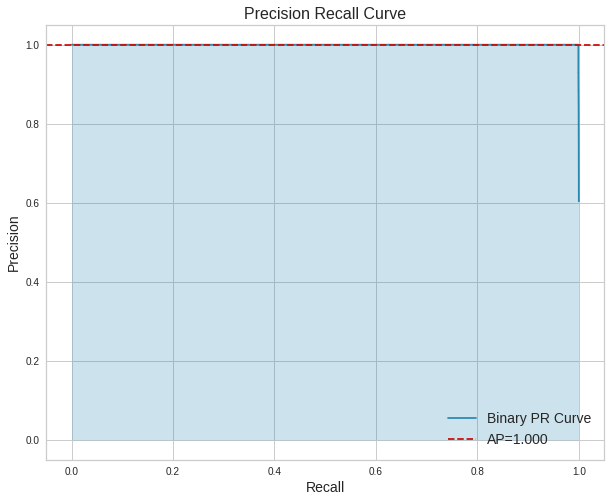

In [0]:
# Have some patience, might take some time :)
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42, n_jobs = -1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print('Accuracy Score (Train Data):', np.round(rfc.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(rfc.score(X_test, y_test), decimals = 3))

oversample_random_forest_report = classification_report(y_test, y_pred)
print(oversample_random_forest_report)

plt.figure(figsize = [10, 8])
PRCurve(model = rfc)
plt.show()

## **Model Comparision**

- We found that the **best result** is obtained on the original dataset by using **Extreme Gradient Boosting** that intrinsically performs well on imbalanced data. 

In [0]:
model_names = ['--------------------Logistic Regression---------------------\n', 
               '\n------------------Decision Tree Classifier------------------\n', 
               '\n------------------Random Forest Classifier------------------\n', 
               '\n------------Extreme Gradient Boosting Classifier------------\n']
report = model_names[0] + base_logistic_report + model_names[1] + base_decision_tree_report + model_names[2] + base_random_forest_report + model_names[3] + base_XGB_report
print(report)

--------------------Logistic Regression---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    290764
           1       0.48      0.44      0.46      1605

    accuracy                           0.99    292369
   macro avg       0.74      0.72      0.73    292369
weighted avg       0.99      0.99      0.99    292369

------------------Decision Tree Classifier------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    290764
           1       0.99      0.66      0.79      1605

    accuracy                           1.00    292369
   macro avg       0.99      0.83      0.90    292369
weighted avg       1.00      1.00      1.00    292369

------------------Random Forest Classifier------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    290764
           1       1.00      0.67      0.80      1605


## **Feature Importances**

Now that we know that **XGBoost** outperformed other models, we can check **which features** have been cateogrized as **important** learned by the **model**.

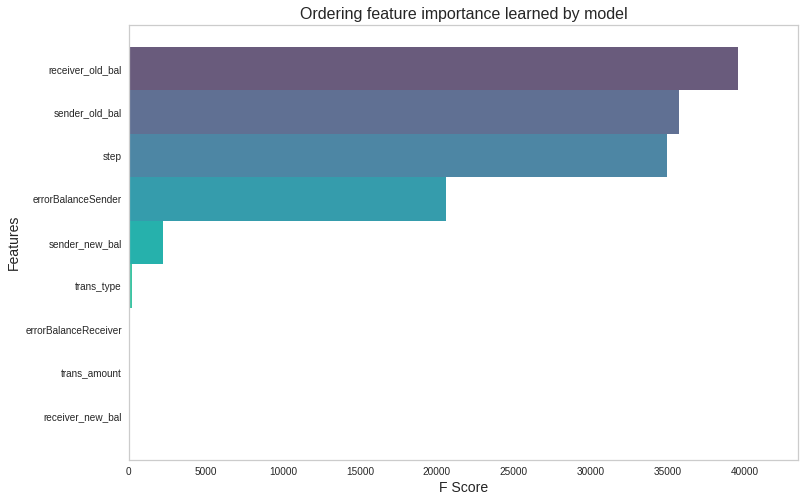

In [0]:
fig = plt.figure(figsize = [12, 8])
ax = fig.add_subplot(1, 1, 1)
colours = ['#CAF270', '#95E681', '#65D794', '#3CC5A3', '#26B1AC', '#359CAC', '#4D86A4', '#607093', '#695B7C']
ax = plot_importance(base_clf, height = 1, color = colours, grid = False, show_values = False, importance_type = 'cover', ax = ax)
ax.set_xlabel(xlabel = 'F Score', size = 14)
ax.set_ylabel(ylabel = 'Features', size = 14)
plt.title('Ordering feature importance learned by model', size = 16)
plt.show()

**Observation:**

- **receiver_old_bal, sender_old_bal, step, errorBalanceSender, sender_new_bal and trans_type** are the features that are categorized as **important** by **XGBoost model**.

## **Tree Generation**

- For the **visualization purpose** we have **generated** and **saved** a **Tree** based on the **information** learned by our model.

In [0]:
# Setting parameters 
cond_node_param = {'shape':'box', 'style': 'filled, rounded', 'fillcolor': '#e85f7b', 'fontcolor':'#e6edec'}
leaf_param = {'shape':'circle', 'style': 'filled, rounded', 'fillcolor': '#90BAB2', 'shape-size':'small'}

# Generating tree
image = to_graphviz(base_clf, yes_color = '#308D6D', no_color = '#EB7D93', condition_node_params = cond_node_param, leaf_node_params=leaf_param)

# Exporting image due to large size
image.render(filename='TREE', format='png')
print('Done!')

Done!


<a id = Section9></a>
# **9. Conclusion**

- We investigated about retention of **important features** (**receiver_old_bal, sender_old_bal, step, errorBalanceSender, sender_new_bal, trans_type**) and removal of **un-important feautures** (**sender_name, receiver**).
- We generated two more features i.e. **errorBalanceSender** and **errorBalanceReceiver** from which turns out that **errorBalanceSender** was one of the **potential feature to identify fraudulent transaction.**
- To deal with the large skewed data, we chose an appropriate procedure i.e. manually dropped records of **sender's data** containing **0s** on both before and after balances and **replacing -1 for receiver side** identifying that amount was transfered but still showing 0 balances before and after transaction.
- To deal with the imbalanced data we could have applied SMOTE and then performed the model building **only if we didn't have** a model like **Extreme Gradient Boosting but we choose not to.**
- We **developed different machine learning algorithms i.e. Logistic Regression, Decision Tree Classifier, Random Forest Classifier and Extreme Gradient Boosting Classifier.**
- **Extreme Gradient Boosting Classifier** outperformed all the models achieving almost perfect average precision recall score.

